In [60]:
import warnings 
warnings.filterwarnings("ignore")

In [2]:
import numpy as np  # For numerical operations
import pandas as pd  # For data manipulation and analysis
import re  # Import the regular expressions module for pattern matching and text processing
from scipy import stats  # Import stats module for Z-score
import matplotlib.pyplot as plt  # For plotting data
import seaborn as sns  # For enhanced data visualizations

# Import libraries for machine learning models and evaluation
from sklearn.model_selection import train_test_split  # For splitting data into training and testing sets
from sklearn.preprocessing import StandardScaler, OneHotEncoder  # For scaling numerical data and encoding categorical data
from sklearn.linear_model import LinearRegression, ElasticNet  # For linear Regression
from sklearn.tree import DecisionTreeRegressor  # For Decision Tree Regression
from sklearn.ensemble import RandomForestRegressor  # For Random Forest Regression
from sklearn.svm import SVR  # For Support Vector Regression 

#import xgboost as xgb # For XGBoost Regression
from sklearn.model_selection import cross_validate  # To perform cross-validation
from sklearn.metrics import mean_squared_error, r2_score, make_scorer  # For model evaluation metrics
from sklearn.model_selection import GridSearchCV  

In [3]:
sns.set(style='whitegrid', palette='muted', font_scale=1.2)
plt.rcParams['figure.figsize'] = [10, 6]

In [4]:
# Load the dataset
data = pd.read_csv(r"C:\Users\braid\Downloads\Electric_cars_dataset.csv", encoding="latin-1")

#"encoding='latin-1'" is used to handle special characters in the dataset.
#This ensures that the dataset is read correctly, especially if it contains special characters like é, ñ, ü, etc.

In [5]:
data = data.sample(1000)

In [6]:
# Display 10 random rows of the dataset
data.sample(10)

,ID,VIN (1-10),County,City,State,ZIP Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,Expected Price ($1k)
52419,EV54324,5YJ3E1EA3L,Pierce,UNIVERSITY PLACE,WA,98467.0,2020.0,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,266,0,28.0,7895961,POINT (-122.537695 47.205343),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,50
7534,EV46599,5YJ3E1EB9M,Clark,AMBOY,WA,98601.0,2021.0,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,20.0,171293230,POINT (-122.419201 45.935421),BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF C...,64
19121,EV12585,5YJXCDE2XL,Thurston,OLYMPIA,WA,98506.0,2020.0,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,289,0,22.0,193682800,POINT (-122.86836 47.085951),PUGET SOUND ENERGY INC,102
7379,EV31135,5YJ3E1EA3M,King,SEATTLE,WA,98105.0,2021.0,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,43.0,138722076,POINT (-122.298657 47.663771),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),64
29834,EV41986,5YJSA1E29H,Skagit,ANACORTES,WA,98221.0,2017.0,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,40.0,348278157,POINT (-122.628418 48.487079),PUGET SOUND ENERGY INC,60
23298,EV29841,5YJYGDEE5M,King,KENT,WA,98031.0,2021.0,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,33.0,148262306,POINT (-122.196448 47.40561),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),73
25219,EV56203,5YJ3E1EBXJ,Snohomish,WOODINVILLE,WA,98077.0,2018.0,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,0,1.0,475052476,POINT (-122.057522 47.749161),PUGET SOUND ENERGY INC,69
1267,EV55872,3FA6P0PU9J,Franklin,PASCO,WA,99301.0,2018.0,FORD,FUSION,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,21,0,9.0,153797248,POINT (-118.98992 46.371381),BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF F...,19
21280,EV74306,WDC0G5EB7K,King,MERCER ISLAND,WA,98040.0,2019.0,MERCEDES-BENZ,GLC-CLASS,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,10,0,41.0,269728847,POINT (-122.227947 47.565443),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),34.5
41598,EV80806,1N4AZ1CPXJ,Thurston,YELM,WA,98597.0,2018.0,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,151,0,2.0,243684549,POINT (-122.558621 46.888349),PUGET SOUND ENERGY INC,21


In [7]:
# Display a concise summary of the dataframe, including the number of non-null entries and the data type of each column
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 12949 to 24664
Data columns (total 18 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   ID                                                 1000 non-null   object 
 1   VIN (1-10)                                         1000 non-null   object 
 2   County                                             1000 non-null   object 
 3   City                                               1000 non-null   object 
 4   State                                              1000 non-null   object 
 5   ZIP Code                                           1000 non-null   float64
 6   Model Year                                         1000 non-null   float64
 7   Make                                               1000 non-null   object 
 8   Model                                              999 non-null    object 
 9   Electric

In [8]:
data.isnull().sum() #to know the number of missing values in the data set 

ID                                                   0
VIN (1-10)                                           0
County                                               0
City                                                 0
State                                                0
ZIP Code                                             0
Model Year                                           0
Make                                                 0
Model                                                1
Electric Vehicle Type                                0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0
Electric Range                                       0
Base MSRP                                            0
Legislative District                                 2
DOL Vehicle ID                                       0
Vehicle Location                                     2
Electric Utility                                     8
Expected Price ($1k)                                 0
dtype: int

In [9]:
#You can either replace numerical columns with the mean and replace categorial columns with the mode 
#Drop missing rows

data.dropna(inplace=True)

In [10]:
data.isnull().sum()

ID                                                   0
VIN (1-10)                                           0
County                                               0
City                                                 0
State                                                0
ZIP Code                                             0
Model Year                                           0
Make                                                 0
Model                                                0
Electric Vehicle Type                                0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0
Electric Range                                       0
Base MSRP                                            0
Legislative District                                 0
DOL Vehicle ID                                       0
Vehicle Location                                     0
Electric Utility                                     0
Expected Price ($1k)                                 0
dtype: int

In [11]:
# Summary statistics of numerical columns
data.describe()

,ZIP Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID
count,989.000000,989.000000,989.000000,989.000000,989.000000,9.890000e+02
mean,98249.516684,2018.194135,111.039434,2318.038423,29.851365,1.995206e+08
std,297.882740,2.700413,104.892867,11617.740507,14.682164,1.045446e+08
min,98001.000000,2011.000000,0.000000,0.000000,1.000000,2.794290e+05
25%,98040.000000,2017.000000,14.000000,0.000000,19.000000,1.398648e+08
50%,98118.000000,2018.000000,75.000000,0.000000,34.000000,1.758544e+08
75%,98359.000000,2021.000000,215.000000,0.000000,43.000000,2.380729e+08
max,99403.000000,2022.000000,330.000000,69900.000000,49.000000,4.788204e+08


In [12]:
# Summary statistics of categorical columns
data.describe(include = 'object')

,ID,VIN (1-10),County,City,State,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Vehicle Location,Electric Utility,Expected Price ($1k)
count,989,989,989,989,989,989,989,989,989,989,989,989
unique,989,700,26,146,1,25,67,2,3,240,35,130
top,EV15541,5YJYGDEE5M,King,SEATTLE,WA,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,POINT (-122.203169 47.619011),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),69
freq,1,11,506,153,989,450,208,754,630,23,368,94


In [13]:
data["Expected Price ($1k)"].unique()

array(['64', '73', '19', '90', '20', '43', '50', '26', '21.9', '18', '46',
       '98.4', '65', '69', '54', '39.9', '46.745', '15', '9.079', '33.89',
       '21', '25', '42.8', '57', '102', '78', '26.22', '39', '29.998',
       '72', '70', '28.1', '42', '36.5', '20.004', '21.53', '105', '27.4',
       '20.6', '17', '41.78', '27', '18.5', '21.3', '24.283', '31.5',
       '16', '60', '15.2', '22.3', '62', '18.374', '142', '30.2', '33',
       '30', '28', '59.979', '36.6', '40', '24', '136.8', '82.5', '52.9',
       '95', '18.058', '16.5', '36.98', '33.5', '34.5', '14.5', '8.9',
       '60.2', '51.573', '18.86', '63.4', '21.998', '23.25', '16.365',
       '21.258', '33.9', '36', '85', '24.69', '13.115', '9.035', '65.9',
       '25.004', '7', '80', '55.9', '38.5', '43.912', '15.5', '29.49',
       '35', '68', '51', '22.2', '30.8', '31.67', '45', '42.9', '6.9',
       '22.857', '11.75', '5.499', '45.7', '67.07', '32.1', '48.9', '32',
       '58.6', '73.9', '37', '13.9', '32.3', '37.3', '23'

In [14]:
# Remove the "N/" suffix from the '"Expected Price ($1k)"' column and convert it to an integer
data["Expected Price ($1k)"] = data["Expected Price ($1k)"].str.replace("N/", "0").astype('float')

In [15]:
print(data.columns)

Index(['ID', 'VIN (1-10)', 'County', 'City', 'State', 'ZIP Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', 'Expected Price ($1k)'],
      dtype='object')


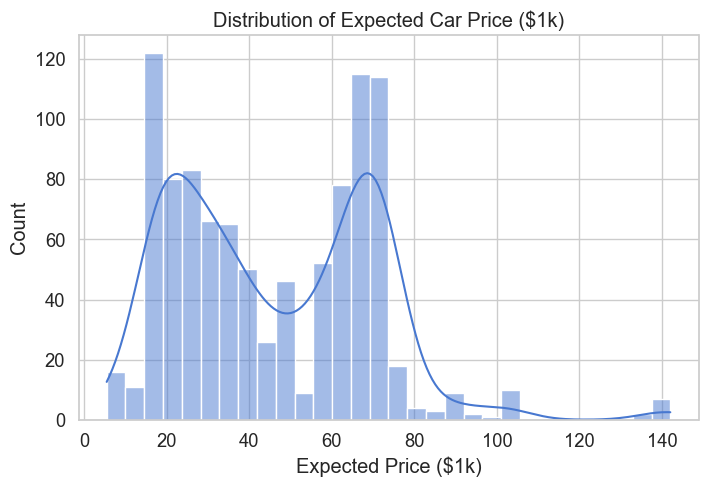

In [16]:
# Set the figure size to 8x5 inches for better visibility
plt.figure(figsize=(8, 5))

# Create a histogram to visualize the distribution of laptop prices
# 'bins=30' ensures the data is divided into 30 intervals
# 'kde=True' adds a Kernel Density Estimate (KDE) line to show the smooth probability distribution
sns.histplot(data["Expected Price ($1k)"], bins=30, kde=True)

# Set the title of the plot
plt.title("Distribution of Expected Car Price ($1k)")

# Display the plot
plt.show()

In [17]:
numerical_features = data.select_dtypes(include='number').columns
len(numerical_features)

7

In [18]:
numerical_features

Index(['ZIP Code', 'Model Year', 'Electric Range', 'Base MSRP',
       'Legislative District', 'DOL Vehicle ID', 'Expected Price ($1k)'],
      dtype='object')

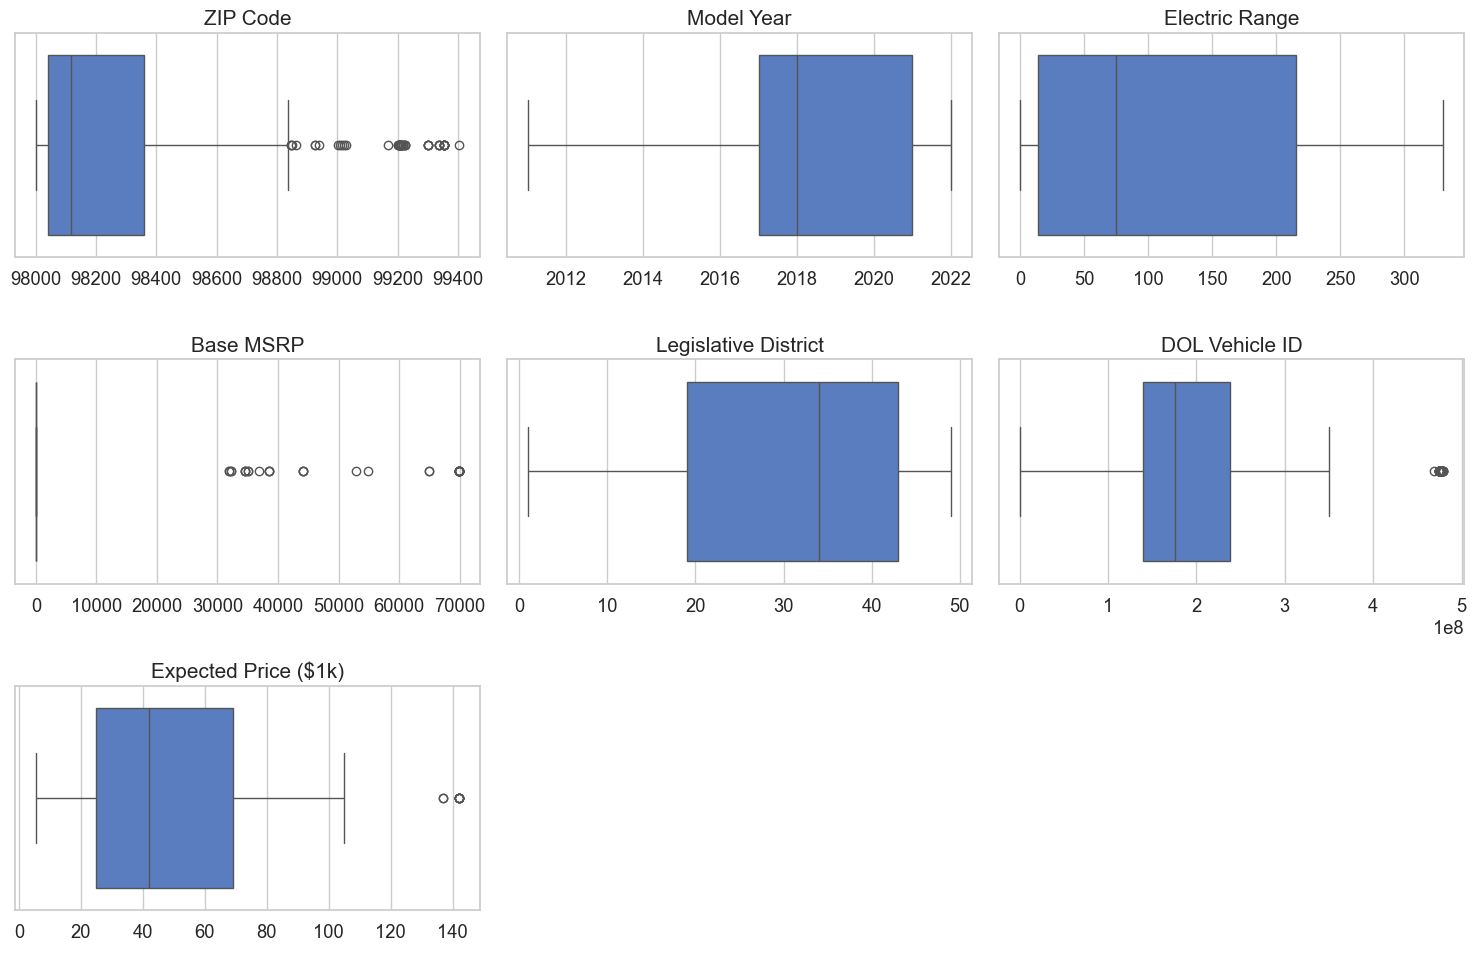

In [19]:
plt.figure(figsize=(15, 10))
for i in range(0, len(numerical_features)):
    plt.subplot(3, 3, i+1)
    sns.boxplot(x = data[numerical_features[i]])
    plt.title(numerical_features[i], fontsize = 15)
    plt.xlabel(' ')
    plt.tight_layout()

In [20]:
categorical_features = data.select_dtypes(include='object').columns
len(categorical_features)

11

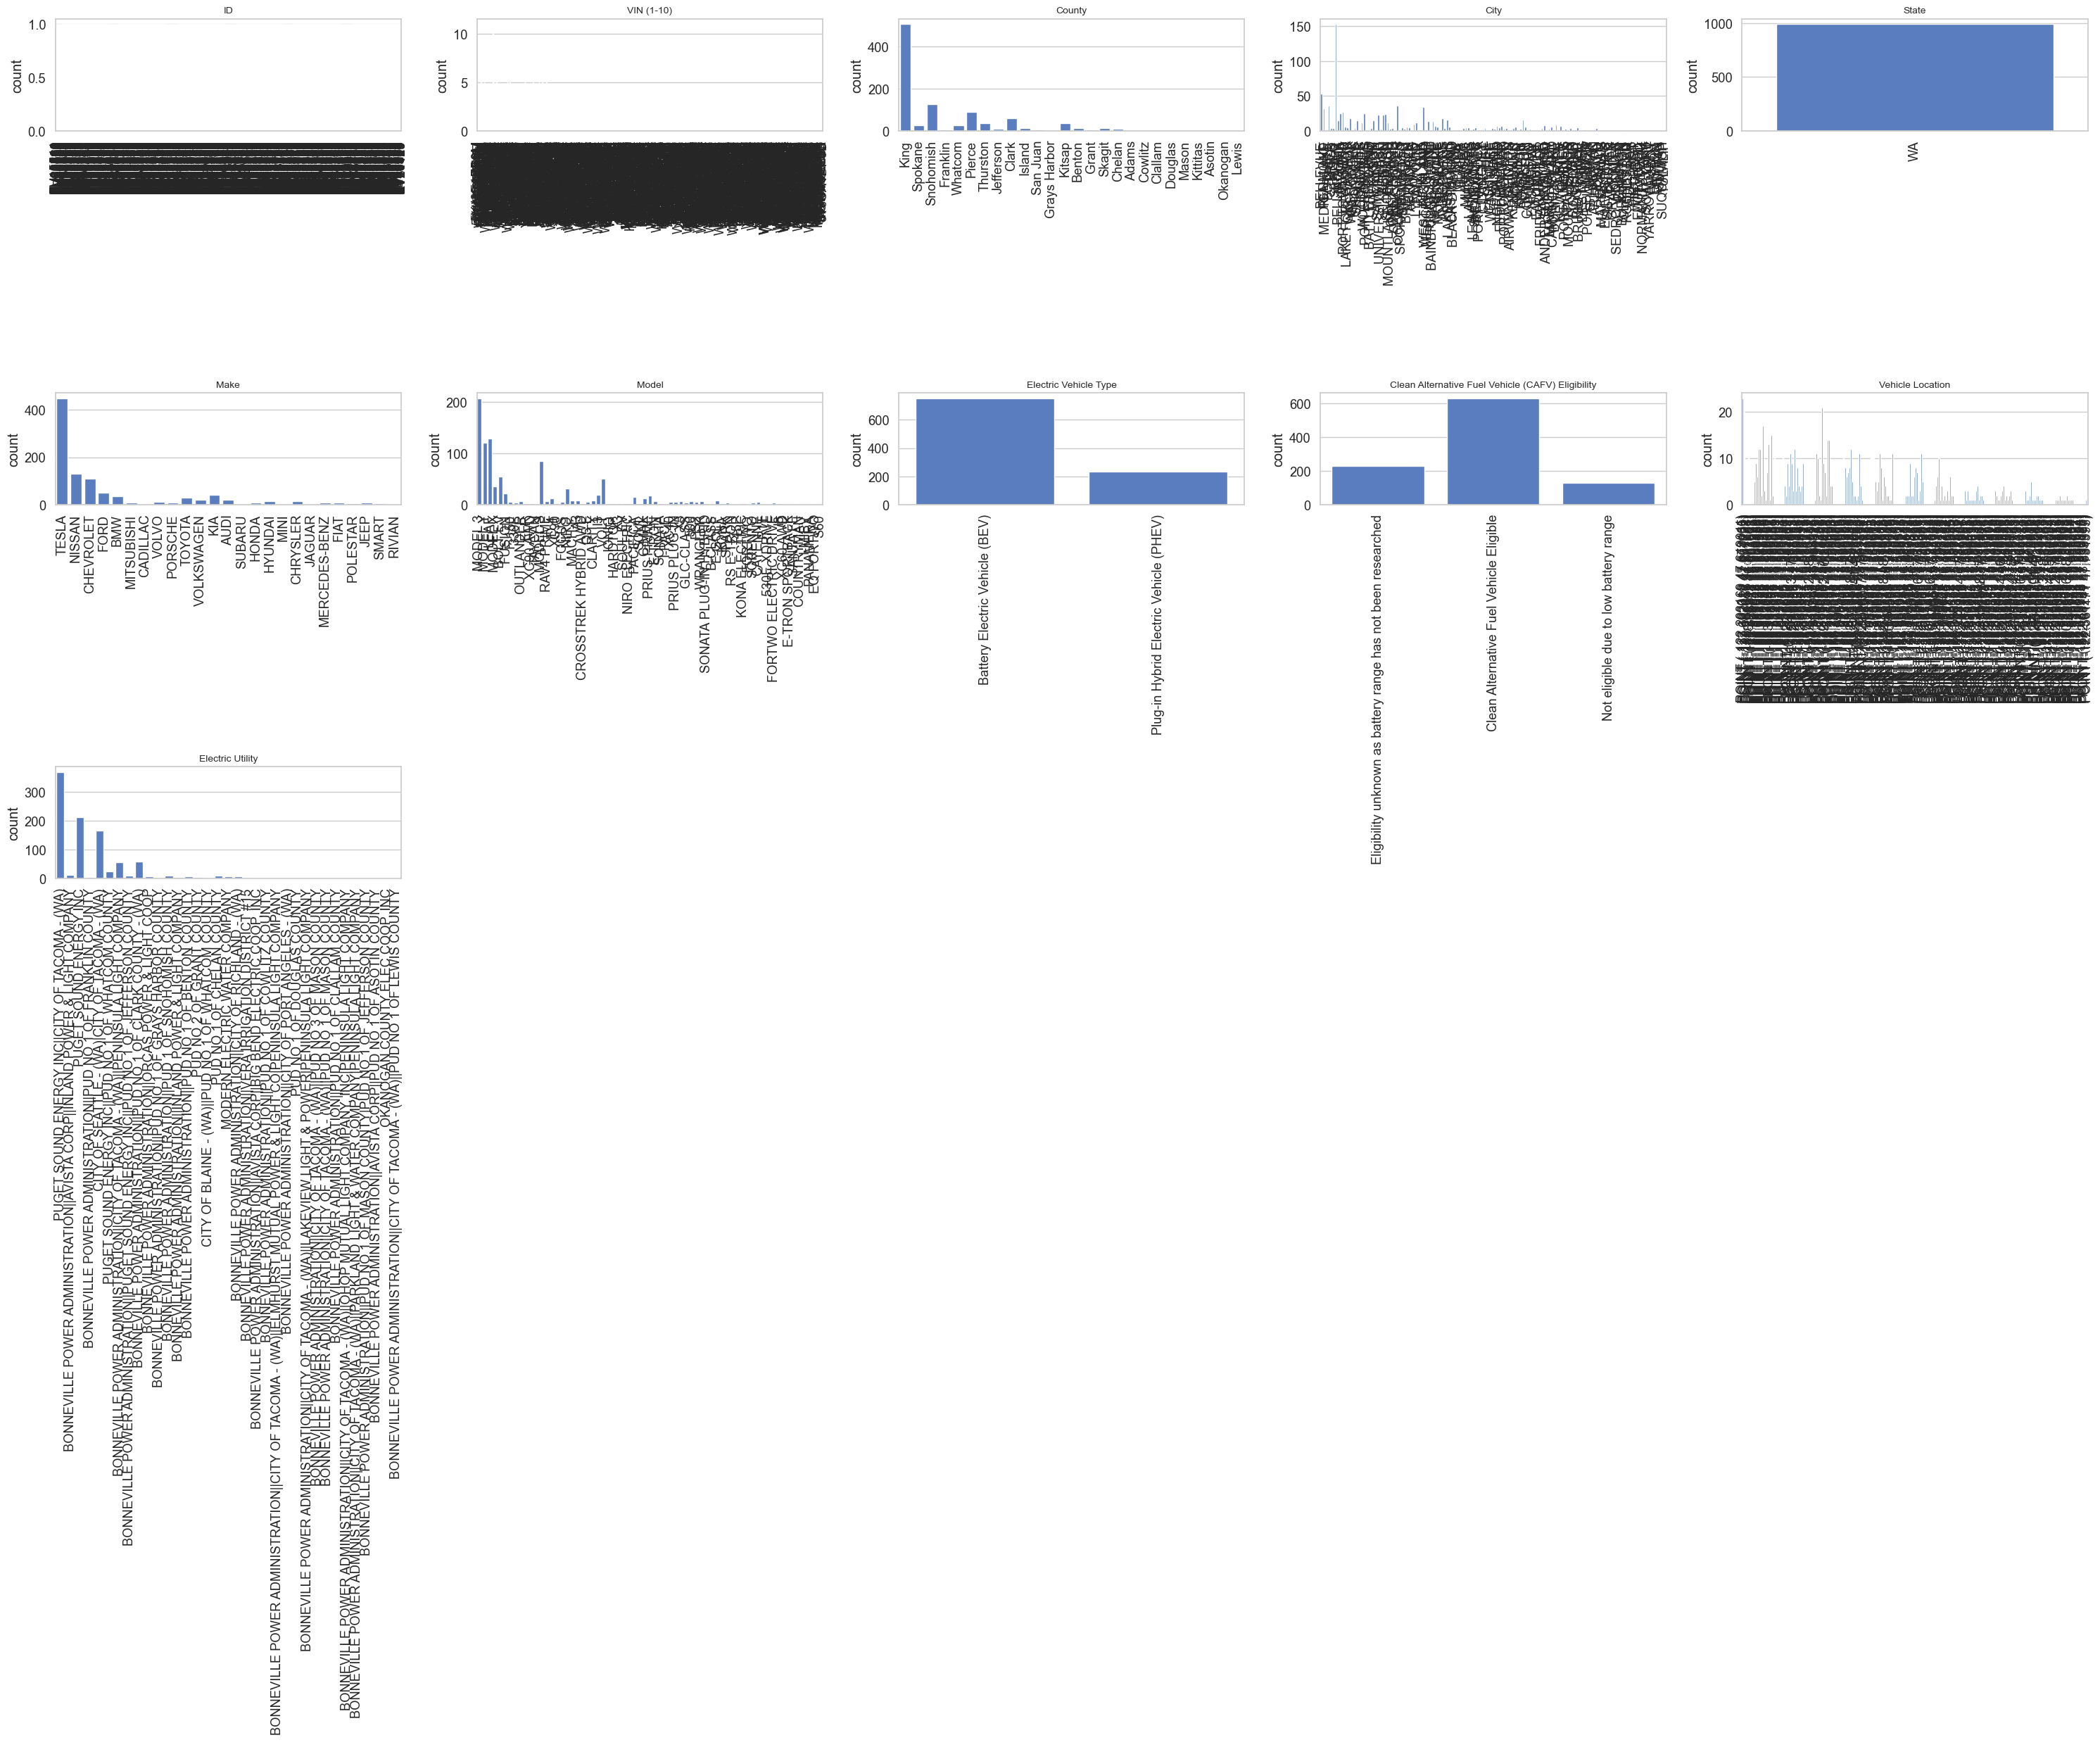

In [21]:
plt.figure(figsize=(30, 50))
for i in range(0, len(categorical_features)):
    plt.subplot(10, 5, i+1)
    sns.countplot(x = data[categorical_features[i]])
    plt.title(categorical_features[i], fontsize = 10)
    plt.xlabel(' ')
    plt.xticks(rotation=90)
    plt.tight_layout()

In [22]:
# Display the value counts of each categorical feature
plt.figure(figsize=(10, 10))
for i in range(0, len(categorical_features)):
    # Print the value counts for each categorical feature
    print(f"Value counts for {categorical_features[i]}:")
    print(data[categorical_features[i]].value_counts())

Value counts for ID:
ID
EV15541    1
EV33033    1
EV3100     1
EV50312    1
EV56370    1
          ..
EV4961     1
EV10439    1
EV37704    1
EV46470    1
EV81199    1
Name: count, Length: 989, dtype: int64
Value counts for VIN (1-10):
VIN (1-10)
5YJYGDEE5M    11
5YJ3E1EA4J     7
5YJYGDEE0M     7
5YJYGDEE2M     7
5YJYGDEE3M     6
              ..
WAUTPBFF9G     1
KM8K33AG4M     1
JHMZC5F11J     1
JTMEB3FV7N     1
5YJSA1DP5D     1
Name: count, Length: 700, dtype: int64
Value counts for County:
County
King            506
Snohomish       125
Pierce           88
Clark            59
Thurston         36
Kitsap           34
Spokane          27
Whatcom          26
Skagit           12
Benton           12
Island           11
Jefferson        10
Chelan            9
San Juan          7
Grant             4
Franklin          4
Cowlitz           3
Clallam           3
Mason             3
Kittitas          3
Grays Harbor      2
Adams             1
Douglas           1
Asotin            1
Okanogan        

<Figure size 1000x1000 with 0 Axes>

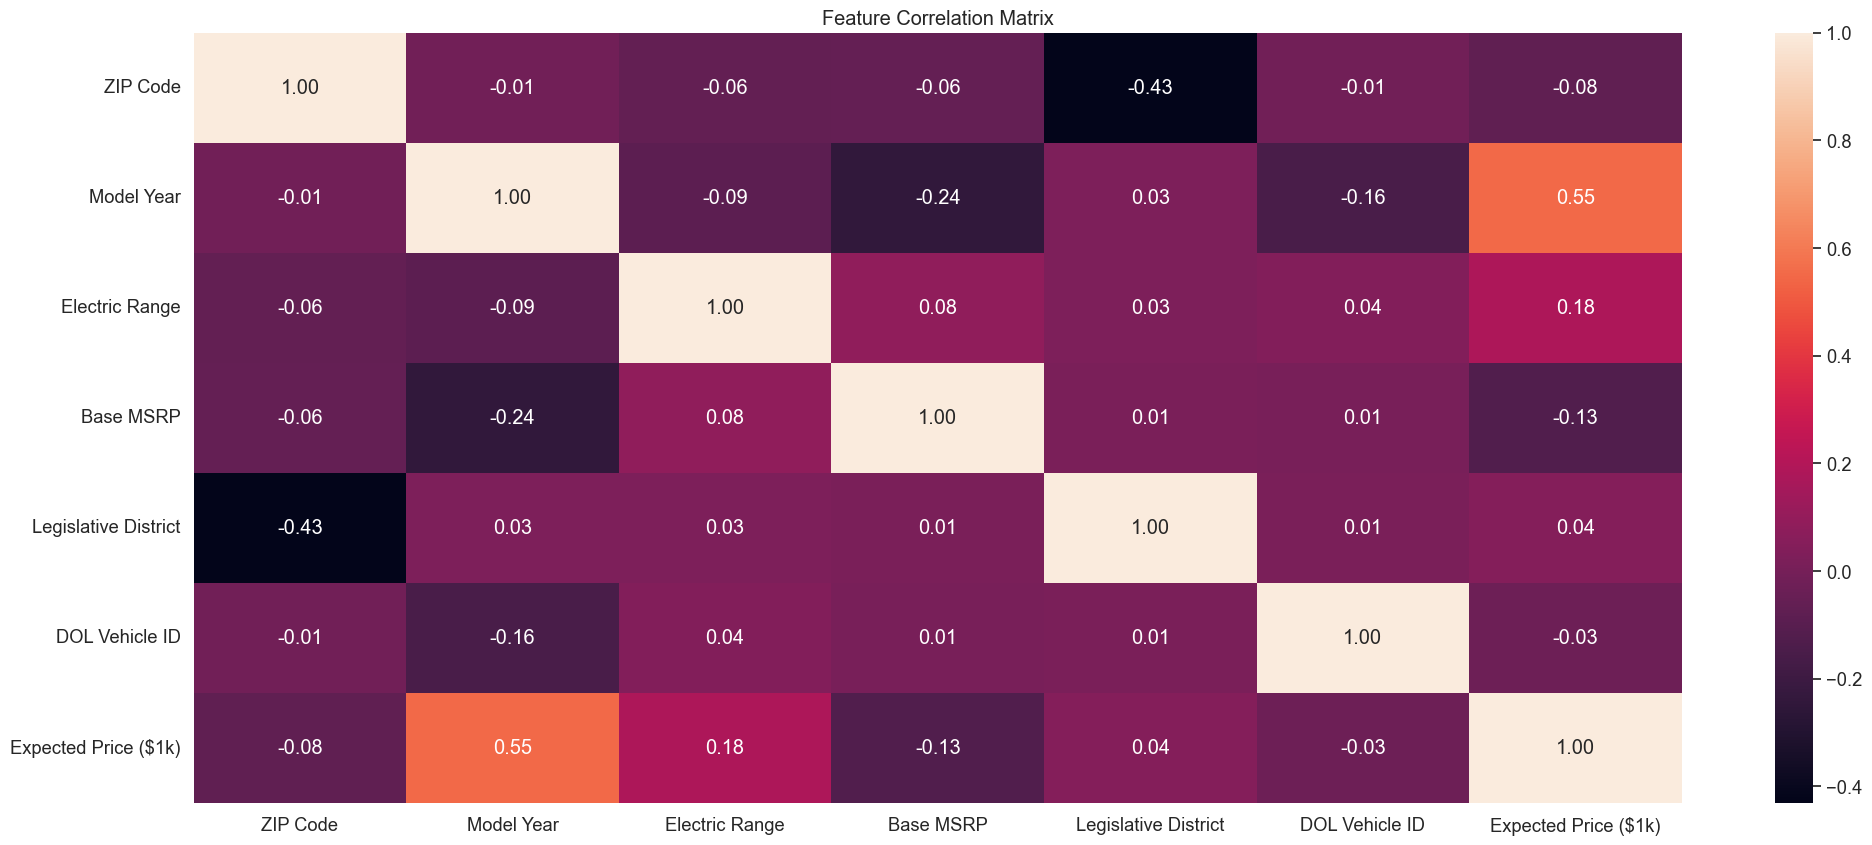

In [23]:
plt.figure(figsize=(24, 10))
correlation_matrix = data[numerical_features].corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f')
plt.title('Feature Correlation Matrix')
plt.show()

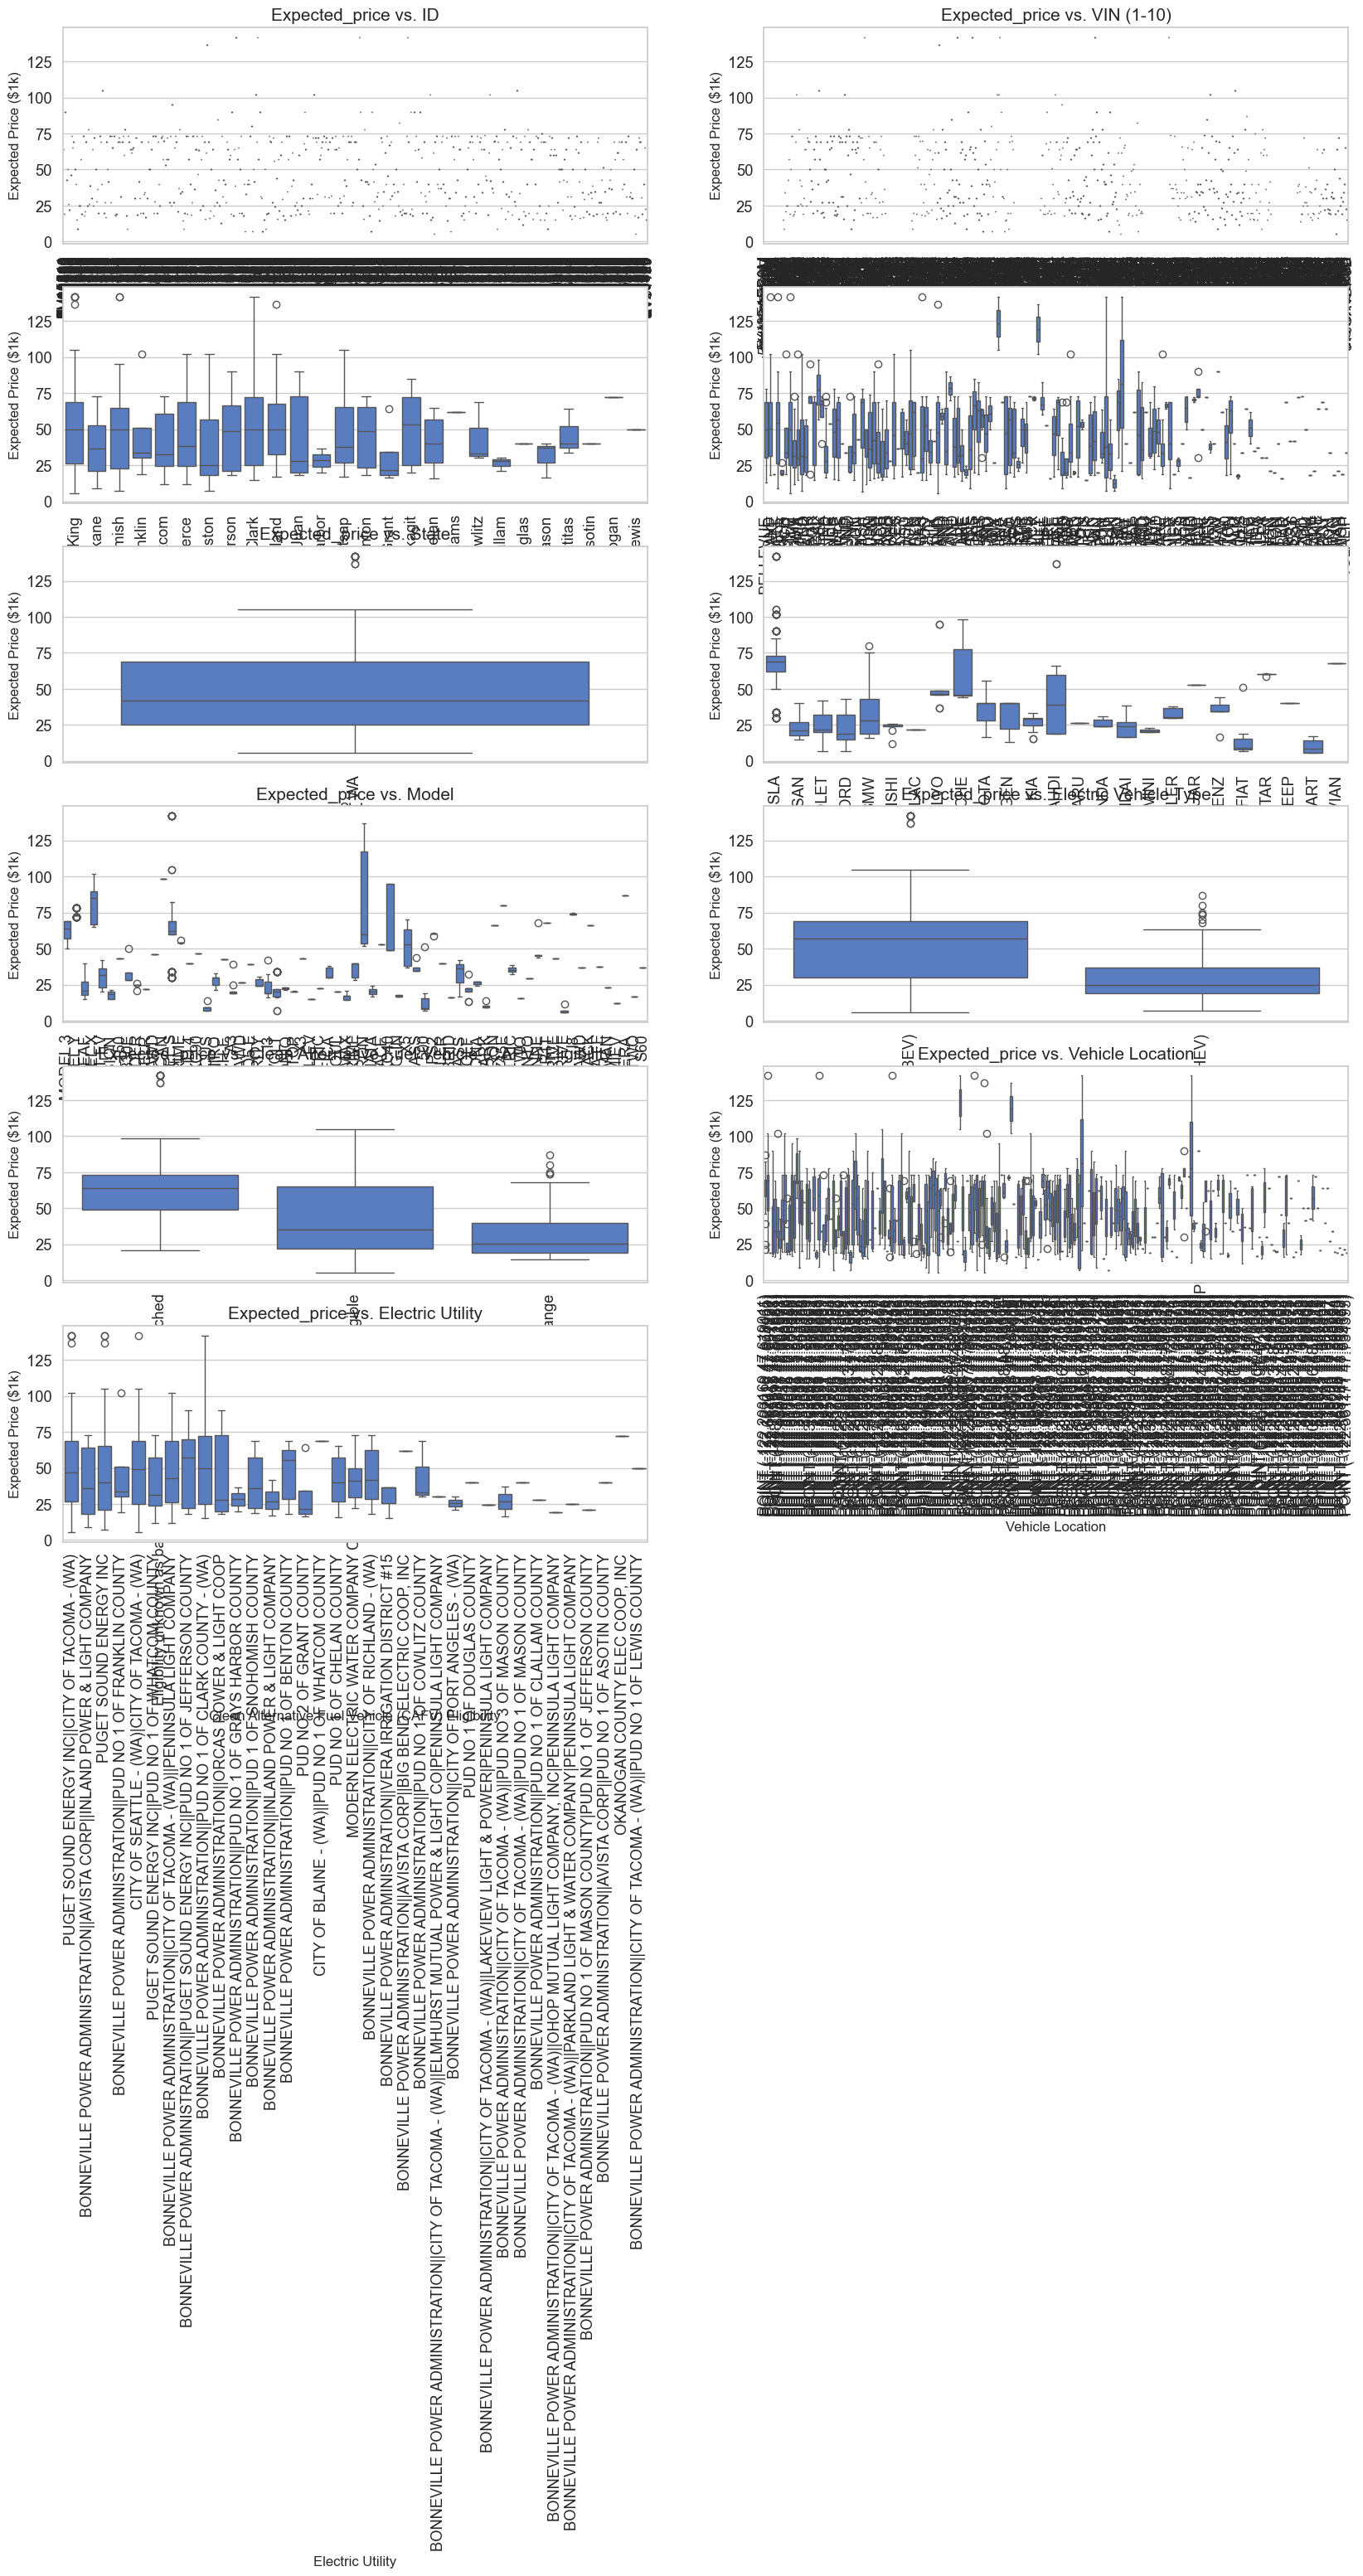

In [24]:
# Box Plot: SalePrice distribution across different categories
plt.figure(figsize=(20, 40))  # Reduce figure size for better visibility
for i in range(0, len(categorical_features)):
    plt.subplot(10, 2, i+1)  # Adjust grid to 2x3 (or whatever fits best)
    sns.boxplot(x=categorical_features[i], y='Expected Price ($1k)', data=data)
    plt.title(f'Expected_price vs. {categorical_features[i]}', fontsize=15)
    plt.xlabel(categorical_features[i], fontsize=12)
    plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
    plt.ylabel('Expected Price ($1k)', fontsize=12)  # Add y-axis label for clarity

# Apply tight_layout after all subplots are created
plt.tight_layout()
plt.show()

In [25]:
# List of categorical columns to be encoded
categorical_cols = ["State", "Electric Vehicle Type", "Clean Alternative Fuel Vehicle (CAFV) Eligibility"]

# Apply one-hot encoding to the categorical columns
# - pd.get_dummies creates binary columns for each category in the categorical columns
# - 'drop_first=True' ensures that we drop the first column of each categorical feature to avoid multicollinearity
data = pd.get_dummies(data, columns=categorical_cols)

# Display the first few rows of the updated DataFrame to check the encoding
data.head()

,ID,VIN (1-10),County,City,ZIP Code,Model Year,Make,Model,Electric Range,Base MSRP,...,DOL Vehicle ID,Vehicle Location,Electric Utility,Expected Price ($1k),State_WA,Electric Vehicle Type_Battery Electric Vehicle (BEV),Electric Vehicle Type_Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle (CAFV) Eligibility_Clean Alternative Fuel Vehicle Eligible,Clean Alternative Fuel Vehicle (CAFV) Eligibility_Eligibility unknown as battery range has not been researched,Clean Alternative Fuel Vehicle (CAFV) Eligibility_Not eligible due to low battery range
12949,EV15541,5YJ3E1EB9M,King,BELLEVUE,98004.0,2021.0,TESLA,MODEL 3,0,0,...,179816311,POINT (-122.203169 47.619011),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),64.0,True,True,False,False,True,False
4884,EV86568,5YJYGAEE6M,King,REDMOND,98052.0,2021.0,TESLA,MODEL Y,0,0,...,170692434,POINT (-122.122018 47.678465),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),73.0,True,True,False,False,True,False
47816,EV62206,1N4AZ0CP2E,Spokane,MEDICAL LAKE,99022.0,2014.0,NISSAN,LEAF,84,0,...,198796601,POINT (-117.692019 47.604929),BONNEVILLE POWER ADMINISTRATION||AVISTA CORP||...,19.0,True,True,False,True,False,False
55200,EV62706,5YJXCDE47J,King,BOTHELL,98011.0,2018.0,TESLA,MODEL X,238,0,...,336781000,POINT (-122.197147 47.757791),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),90.0,True,True,False,True,False,False
14216,EV29432,1G1FX6S09H,Snohomish,BRIER,98036.0,2017.0,CHEVROLET,BOLT EV,238,0,...,348954462,POINT (-122.281856 47.811678),PUGET SOUND ENERGY INC,20.0,True,True,False,True,False,False


In [26]:
# Drop irrelevant columns and separate features (X) and target (y)
X = data.drop(columns=["ID", "VIN (1-10)", "County", "City", "Make", "Model", "Vehicle Location", "Expected Price ($1k)", "Electric Utility", "Base MSRP", "Legislative District", "DOL Vehicle ID"])  # Features
y = data["Expected Price ($1k)"]  # Target variable

In [27]:
X

,ZIP Code,Model Year,Electric Range,State_WA,Electric Vehicle Type_Battery Electric Vehicle (BEV),Electric Vehicle Type_Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle (CAFV) Eligibility_Clean Alternative Fuel Vehicle Eligible,Clean Alternative Fuel Vehicle (CAFV) Eligibility_Eligibility unknown as battery range has not been researched,Clean Alternative Fuel Vehicle (CAFV) Eligibility_Not eligible due to low battery range
12949,98004.0,2021.0,0,True,True,False,False,True,False
4884,98052.0,2021.0,0,True,True,False,False,True,False
47816,99022.0,2014.0,84,True,True,False,True,False,False
55200,98011.0,2018.0,238,True,True,False,True,False,False
14216,98036.0,2017.0,238,True,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...
40134,98077.0,2017.0,200,True,True,False,True,False,False
32269,98020.0,2020.0,266,True,True,False,True,False,False
50372,98208.0,2018.0,238,True,True,False,True,False,False
29796,98087.0,2014.0,19,True,False,True,False,False,True


In [28]:
# Split into Train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
# Create a StandardScaler instance
scaler = StandardScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data
X_test_scaled = scaler.transform(X_test) #

In [30]:
from sklearn.linear_model import LinearRegression

# Initialize the model
linear_reg = LinearRegression()

# Fit the model to the training data
linear_reg.fit(X_train_scaled, y_train)

# Predict on the test data
y_pred_linear = linear_reg.predict(X_test_scaled)

# Evaluate the model
rmse_linear = np.sqrt(mean_squared_error(y_test, y_pred_linear))
r2_linear = r2_score(y_test, y_pred_linear)

print(f"Linear Regression:\n RMSE: {rmse_linear:.4f}\n R²: {r2_linear:.4f}\n")

Linear Regression:
 RMSE: 18.8419
 R²: 0.4911



In [31]:
from sklearn.linear_model import Ridge

# Initialize the model
ridge_reg = Ridge(alpha=1.0)

# Fit the model to the training data
ridge_reg.fit(X_train_scaled, y_train)

# Predict on the test data
y_pred_ridge = ridge_reg.predict(X_test_scaled)

# Evaluate the model
rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
r2_ridge = r2_score(y_test, y_pred_ridge)

print(f"Ridge Regression:\n RMSE: {rmse_ridge:.4f}\n R²: {r2_ridge:.4f}\n")

Ridge Regression:
 RMSE: 18.8520
 R²: 0.4905



In [32]:
from sklearn.linear_model import ElasticNet

# Initialize the Elastic Net model
elastic_net = ElasticNet(alpha=0.1)

# Fit the model
elastic_net.fit(X_train_scaled, y_train)

# Predicting on test data
y_pred_en = elastic_net.predict(X_test_scaled)

# Evaluate the model
rmse_en = np.sqrt(mean_squared_error(y_test, y_pred_en))
r2_en = r2_score(y_test, y_pred_en)

print(f"Elastic Net Regression:\n RMSE: {rmse_en:.4f}\n R²: {r2_en:.4f}\n")

Elastic Net Regression:
 RMSE: 19.2476
 R²: 0.4689



In [33]:
from sklearn.svm import SVR

# Initialize the model
svr_reg = SVR(kernel='linear')

# Fit the model to the training data
svr_reg.fit(X_train_scaled, y_train)

# Predict on the test data
y_pred_svr = svr_reg.predict(X_test_scaled)

# Evaluate the model
rmse_svr = np.sqrt(mean_squared_error(y_test, y_pred_svr))
r2_svr = r2_score(y_test, y_pred_svr)

print(f"Support Vector Regression:\n RMSE: {rmse_svr:.4f}\n R²: {r2_svr:.4f}\n")

Support Vector Regression:
 RMSE: 18.8729
 R²: 0.4894



In [34]:
from sklearn.neighbors import KNeighborsRegressor

# Initialize the model
knn_reg = KNeighborsRegressor(n_neighbors=5)

# Fit the model to the training data
knn_reg.fit(X_train_scaled, y_train)

# Predict on the test data
y_pred_knn = knn_reg.predict(X_test_scaled)

# Evaluate the model
rmse_knn = np.sqrt(mean_squared_error(y_test, y_pred_knn))
r2_knn = r2_score(y_test, y_pred_knn)

print(f"K-Nearest Neighbors:\n RMSE: {rmse_knn:.4f}\n R²: {r2_knn:.4f}\n")

K-Nearest Neighbors:
 RMSE: 16.1537
 R²: 0.6259



In [35]:
from sklearn.tree import DecisionTreeRegressor

# Initialize the model
tree_reg = DecisionTreeRegressor()

# Fit the model to the training data
tree_reg.fit(X_train_scaled, y_train)

# Predict on the test data
y_pred_tree = tree_reg.predict(X_test_scaled)

# Evaluate the model
rmse_tree = np.sqrt(mean_squared_error(y_test, y_pred_tree))
r2_tree = r2_score(y_test, y_pred_tree)

print(f"Decision Tree Regressor:\n RMSE: {rmse_tree:.4f}\n R²: {r2_tree:.4f}\n")

Decision Tree Regressor:
 RMSE: 16.3292
 R²: 0.6178



In [36]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the model
forest_reg = RandomForestRegressor()

# Fit the model to the training data
forest_reg.fit(X_train_scaled, y_train)

# Predict on the test data
y_pred_forest = forest_reg.predict(X_test_scaled)

# Evaluate the model
rmse_forest = np.sqrt(mean_squared_error(y_test, y_pred_forest))
r2_forest = r2_score(y_test, y_pred_forest)

print(f"Random Forest Regressor:\n RMSE: {rmse_forest:.4f}\n R²: {r2_forest:.4f}\n")

Random Forest Regressor:
 RMSE: 13.7792
 R²: 0.7278



In [37]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize the model
gb_reg = GradientBoostingRegressor()

# Fit the model to the training data
gb_reg.fit(X_train, y_train)

# Predict on the test data
y_pred_gb = gb_reg.predict(X_test)

# Evaluate the model
rmse_gb = np.sqrt(mean_squared_error(y_test, y_pred_gb))
r2_gb = r2_score(y_test, y_pred_gb)

print(f"Gradient Boosting Regressor:\n RMSE: {rmse_gb:.4f}\n R²: {r2_gb:.4f}\n")

Gradient Boosting Regressor:
 RMSE: 13.7545
 R²: 0.7288



In [38]:
# Importing LightGBM
import xgboost as xgb

In [39]:
# Initialize the model with some parameters
xgb_reg = xgb.XGBRegressor()

# Fit the model
xgb_reg.fit(X_train, y_train)

# Predicting on test data
y_pred_xgb = xgb_reg.predict(X_test)


# Evaluate the model
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"XGBoost Regressor:\n RMSE: {rmse_xgb:.4f}\n R²: {r2_xgb:.4f}\n")

XGBoost Regressor:
 RMSE: 15.8382
 R²: 0.6404



In [52]:
!pip install lightgbm

# Importing LightGBM
import lightgbm as lgb

   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ------- -------------------------------- 0.3/1.5 MB ? eta -:--:--
   ------- -------------------------------- 0.3/1.5 MB ? eta -:--:--
   ------- -------------------------------- 0.3/1.5 MB ? eta -:--:--
   -------------- ------------------------- 0.5/1.5 MB 598.5 kB/s eta 0:00:02
   --------------------- ------------------ 0.8/1.5 MB 621.2 kB/s eta 0:00:02
   --------------------- ------------------ 0.8/1.5 MB 621.2 kB/s eta 0:00:02
   ---------------------------- ----------- 1.0/1.5 MB 645.1 kB/s eta 0:00:01
   ---------------------------- ----------- 1.0/1.5 MB 645.1 kB/s eta 0:00:01
   ---------------------------- ----------- 1.0/1.5 MB 645.1 kB/s eta 0:00:01
   ---------------------------------------- 1.5/1.5 MB 667.4 kB/s eta 0:00:00


In [62]:
# Initialize the model with default parameters
lgb_reg = lgb.LGBMRegressor()

# Fit the model
lgb_reg.fit(X_train, y_train)

# Predicting on test data
y_pred_lgb = lgb_reg.predict(X_test)

# Evaluate the model
rmse_lgb = np.sqrt(mean_squared_error(y_test, y_pred_lgb))
r2_lgb = r2_score(y_test, y_pred_lgb)

print(f"LightGBM Regressor:\n RMSE: {rmse_lgb:.4f}\n R²: {r2_lgb:.4f}")

LightGBM Regressor:
 RMSE: 15.0155
 R²: 0.6768


In [58]:
lgb_reg = lgb.LGBMRegressor( 
    verbose=-1
)
lgb_reg.fit(X_train, y_train)

LGBMRegressor(verbose=-1)